In [1]:
import pandas as pd
from pandas import Series, DataFrame

# 1. 시계열 데이터 기초

## 1.1 시계열 데이터 타입(datetime)

In [2]:
import datetime as dt

In [4]:
dt.datetime(2021, 3, 2)

datetime.datetime(2021, 3, 2, 0, 0)

In [6]:
now = dt.datetime.now()

In [7]:
now

datetime.datetime(2021, 7, 17, 21, 34, 7, 494995)

In [8]:
# 타임존 지정해서 날짜 생성
dt.datetime(2021, 7, 17, 13, 50, tzinfo = dt.timezone.utc) 

datetime.datetime(2021, 7, 17, 13, 50, tzinfo=datetime.timezone.utc)

In [9]:
dt.datetime.now(tz = dt.timezone.utc)

datetime.datetime(2021, 7, 17, 12, 35, 58, 755545, tzinfo=datetime.timezone.utc)

In [15]:
now.astimezone(dt.timezone.utc)

datetime.datetime(2021, 7, 17, 12, 34, 7, 494995, tzinfo=datetime.timezone.utc)

In [13]:
dt.datetime.now()

datetime.datetime(2021, 7, 17, 21, 38, 28, 241031)

## 1.2 timedelta 를 활용한 시간 계산

In [16]:
from datetime import timedelta

In [17]:
now

datetime.datetime(2021, 7, 17, 21, 34, 7, 494995)

In [18]:
# 현재 시간 기준으로 100일 뒤의 날짜
now + timedelta(days = 100)

datetime.datetime(2021, 10, 25, 21, 34, 7, 494995)

In [34]:
# 현재 시간 기준으로 1시간 25분 후의 시간
now + timedelta(hours = 1, minutes = 25)

datetime.datetime(2021, 7, 17, 22, 59, 7, 494995)

In [25]:
# 두 날짜 간의 차이 계산
dt1 = dt.datetime(2021, 3, 2, 9, 30)
dt2 = dt.datetime(2023, 5, 18, 13, 15)

In [27]:
diff = dt2 - dt1

In [28]:
diff

datetime.timedelta(days=807, seconds=13500)

In [29]:
diff.seconds//3600

3

In [32]:
diff.seconds/60%60

45.0

## 1.3 시계열 데이터 처리

In [36]:
import random
import pandas as pd
from pandas import DataFrame, Series
sample = DataFrame()
sample['date'] = pd.date_range(start = '20210101', periods=500).tolist()
sample['count'] = random.sample(range(1,1000), 500)

In [37]:
sample

,date,count
0,2021-01-01,453
1,2021-01-02,126
2,2021-01-03,662
3,2021-01-04,468
4,2021-01-05,815
...,...,...
495,2022-05-11,515
496,2022-05-12,321
497,2022-05-13,965
498,2022-05-14,664


In [38]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    500 non-null    datetime64[ns]
 1   count   500 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 KB


In [39]:
sample.date.min()

Timestamp('2021-01-01 00:00:00')

In [41]:
sample.date.max()

Timestamp('2022-05-15 00:00:00')

In [45]:
# 7월달 데이터만 조회 #1 
# 조건 색인 활용
sample[(sample.date >= '2021-07-01') & (sample.date <= '2021-07-31')]

,date,count
181,2021-07-01,958
182,2021-07-02,397
183,2021-07-03,306
184,2021-07-04,743
185,2021-07-05,724
186,2021-07-06,520
187,2021-07-07,31
188,2021-07-08,137
189,2021-07-09,624
190,2021-07-10,907


In [46]:
pd.date_range(start = '2021-07-01', end = '2021-07-31') 

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', freq='D')

In [47]:
# 7월달 데이터만 조회 #2
# isin() 함수 활용
sample[sample.date.isin(pd.date_range(start = '2021-07-01', end = '2021-07-31') )]

,date,count
181,2021-07-01,958
182,2021-07-02,397
183,2021-07-03,306
184,2021-07-04,743
185,2021-07-05,724
186,2021-07-06,520
187,2021-07-07,31
188,2021-07-08,137
189,2021-07-09,624
190,2021-07-10,907


In [51]:
# 7월달 데이터마 조회 #3
# datetimeIndex 활용
sample2 = sample.set_index('date')
sample2

,count
date,
2021-01-01,453
2021-01-02,126
2021-01-03,662
2021-01-04,468
2021-01-05,815
...,...
2022-05-11,515
2022-05-12,321
2022-05-13,965


- datetimeIndex 색인

In [52]:
# 2021년 데이터 선택
sample2['2021']

,count
date,
2021-01-01,453
2021-01-02,126
2021-01-03,662
2021-01-04,468
2021-01-05,815
...,...
2021-12-27,485
2021-12-28,338
2021-12-29,970


In [53]:
sample2['2021-07']

,count
date,
2021-07-01,958
2021-07-02,397
2021-07-03,306
2021-07-04,743
2021-07-05,724
2021-07-06,520
2021-07-07,31
2021-07-08,137
2021-07-09,624


In [55]:
# 2021년 3월 2일부터 2021년 3월 28일까지 데이터 선택
sample2['2021-03-02':'2021-03-28']

,count
date,
2021-03-02,392
2021-03-03,548
2021-03-04,986
2021-03-05,465
2021-03-06,576
2021-03-07,478
2021-03-08,947
2021-03-09,942
2021-03-10,93


In [57]:
# 2021년 4월 28일 데이터 선택
sample2.loc['2021-04-28']

count    796
Name: 2021-04-28 00:00:00, dtype: int64

## 1-4 strptime()으로 문자열을 날짜 타입으로 변환하기

In [58]:
문자열 = '21/08/11'

In [59]:
# 21년 8월 11일로 변환 
dt.datetime.strptime(문자열, '%y/%m/%d')

datetime.datetime(2021, 8, 11, 0, 0)

In [60]:
# 11년 8월 21일로 변환
dt.datetime.strptime(문자열, '%d/%m/%y')

datetime.datetime(2011, 8, 21, 0, 0)

In [63]:
# 8월 11일 21시로 변환
dt1 = dt.datetime.strptime(문자열, '%H/%m/%d')

In [64]:
# dt1의 year를 2021로 업데이트
#dt1.year = 2021
dt1.replace(year = 2021)

datetime.datetime(2021, 8, 11, 21, 0)

##### [실습] 아래 df에서 2020년 7월 데이터만 선택하기

In [65]:
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

,date,value
0,2020-07-01,80
1,2020-07-02,81
2,2020-07-05,56
3,2020-07-10,94
4,2020-07-23,39
5,2020-07-24,88
6,2020-07-28,37
7,2020-08-05,59
8,2020-08-10,89
9,2020-08-23,13


In [67]:
df.set_index('date')['2020-07']

KeyError: '2020-07'

In [ ]:
# 위에서 배운대로 해도 정상적으로 동작하지 않음


In [71]:
# 해결책. df의 date컬럼의 타입을 datetime으로 변환
#1 striptime 활용
df['date2'] = df.date.apply(lambda X: dt.datetime.strptime(X, '%Y-%m-%d'))

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 368.0+ bytes


In [ ]:
#2

In [75]:
df['date3'] = pd.to_datetime(df.date, format = '%Y-%m-%d')

In [76]:
df

,date,value,date2,date3
0,2020-07-01,80,2020-07-01,2020-07-01
1,2020-07-02,81,2020-07-02,2020-07-02
2,2020-07-05,56,2020-07-05,2020-07-05
3,2020-07-10,94,2020-07-10,2020-07-10
4,2020-07-23,39,2020-07-23,2020-07-23
5,2020-07-24,88,2020-07-24,2020-07-24
6,2020-07-28,37,2020-07-28,2020-07-28
7,2020-08-05,59,2020-08-05,2020-08-05
8,2020-08-10,89,2020-08-10,2020-08-10
9,2020-08-23,13,2020-08-23,2020-08-23


In [79]:
# 7월 데이터만 조회
df.set_index('date2')['2020-07']

,date,value,date3
date2,,,
2020-07-01,2020-07-01,80,2020-07-01
2020-07-02,2020-07-02,81,2020-07-02
2020-07-05,2020-07-05,56,2020-07-05
2020-07-10,2020-07-10,94,2020-07-10
2020-07-23,2020-07-23,39,2020-07-23
2020-07-24,2020-07-24,88,2020-07-24
2020-07-28,2020-07-28,37,2020-07-28


## 1.5 strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [82]:
# now 변수를 4자리년도-월-일 형식으로 출력
now.strftime('%Y-%m-%d')
dt.datetime.strftime(now, '%Y-%m-%d')

'2021-07-17'

In [85]:
# 실습 - now 변수를 월-일 시:분 형식으로 출력
now.strftime('%m-%d %H:%M')

'07-17 21:34'

* Tip. Week와 요일 정보 얻기(strftime)

In [86]:
now

datetime.datetime(2021, 7, 17, 21, 34, 7, 494995)

In [133]:
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

In [90]:
df['date'] = pd.to_datetime(df.date)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [94]:
now.strftime('%V')

'28'

In [95]:
now.strftime('%w')

'6'

##### [실습 #2] df에  week number(%U), weekday(%a) 컬럼 추가

In [101]:
#df에  week number(%V), weekday(%w) 컬럼 추가
df['weekNumber'] = df.date.apply(lambda X : X.strftime('%V'))
df['weekDay'] = df.date.apply(lambda X : X.strftime('%a'))

##### [실습 #3-1] 주차별 value 컬럼의 합 구하기

In [103]:
df.pivot_table(index = 'weekNumber', values = 'value', aggfunc = 'sum')

,value
weekNumber,
27,217
28,94
30,127
31,37
32,59
33,89
34,13


##### [실습 #3-2] 요일별 value 컬럼의 평균 구하기

In [105]:
df.pivot_table(index = 'weekDay', values = 'value', aggfunc = 'sum')

,value
weekDay,
Fri,182
Mon,89
Sun,69
Thu,120
Tue,37
Wed,139


## 2. 시계열 데이터 응용 - Covid-19 현황 분석

#### 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [106]:
covid = pd.read_excel('data/owid-covid-data.xlsx')

In [107]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [110]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70851 non-null  object 
 1   continent                              67325 non-null  object 
 2   location                               70851 non-null  object 
 3   date                                   70851 non-null  object 
 4   total_cases                            69938 non-null  float64
 5   new_cases                              69936 non-null  float64
 6   new_cases_smoothed                     68935 non-null  float64
 7   total_deaths                           60914 non-null  float64
 8   new_deaths                             61072 non-null  float64
 9   new_deaths_smoothed                    68935 non-null  float64
 10  total_cases_per_million                69555 non-null  float64
 11  ne

##### 2. date 컬럼을 datetime으로 변경하기

In [112]:
covid.date = pd.to_datetime(covid.date, format = '%Y-%m-%d')

In [113]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               70851 non-null  object        
 1   continent                              67325 non-null  object        
 2   location                               70851 non-null  object        
 3   date                                   70851 non-null  datetime64[ns]
 4   total_cases                            69938 non-null  float64       
 5   new_cases                              69936 non-null  float64       
 6   new_cases_smoothed                     68935 non-null  float64       
 7   total_deaths                           60914 non-null  float64       
 8   new_deaths                             61072 non-null  float64       
 9   new_deaths_smoothed                    68935 non-null  float6

#### 3. 간단하게 분석하기 위해 데이터 범위 좁히기
- United States, Brazil, France, South Korea 데이터만 선택

In [117]:
covid = covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

- location, date, total_cases, new_cases 컬럼만 선택

In [121]:
covid = covid[['location', 'date', 'total_cases', 'new_cases']]

In [122]:
covid

,location,date,total_cases,new_cases
9104,Brazil,2020-02-26,1.0,1.0
9105,Brazil,2020-02-27,1.0,0.0
9106,Brazil,2020-02-28,1.0,0.0
9107,Brazil,2020-02-29,2.0,1.0
9108,Brazil,2020-03-01,2.0,0.0
...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0
67544,United States,2021-02-20,28077620.0,71510.0
67545,United States,2021-02-21,28134115.0,56495.0
67546,United States,2021-02-22,28190159.0,56044.0


#### 4. 데이터 분석 실습
- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기
- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기
...

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
 - 월별 마지막 날 기준으로 누적 확진자수 구하기
 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 참고

In [126]:
# 매월 마지막 날짜 데이터만 선택
# 이방식대로 하면 번거로움 
covid[covid.date.isin(['2020-02-29', '2020-03-31', '2020-04-30'])]

,location,date,total_cases,new_cases
9107,Brazil,2020-02-29,2.0,1.0
9138,Brazil,2020-03-31,5717.0,1138.0
9168,Brazil,2020-04-30,87187.0,7502.0
23267,France,2020-02-29,100.0,43.0
23298,France,2020-03-31,52278.0,7629.0
23328,France,2020-04-30,168861.0,1218.0
59132,South Korea,2020-02-29,3150.0,813.0
59163,South Korea,2020-03-31,9786.0,125.0
59193,South Korea,2020-04-30,10774.0,9.0
67187,United States,2020-02-29,25.0,8.0


In [129]:
ex1 = covid[covid.date.isin(pd.date_range(start = covid.date.min(), end = covid.date.max(), freq = 'M'))]

In [130]:
ex1

,location,date,total_cases,new_cases
9107,Brazil,2020-02-29,2.0,1.0
9138,Brazil,2020-03-31,5717.0,1138.0
9168,Brazil,2020-04-30,87187.0,7502.0
9199,Brazil,2020-05-31,514849.0,16409.0
9229,Brazil,2020-06-30,1402041.0,33846.0
9260,Brazil,2020-07-31,2662485.0,52383.0
9291,Brazil,2020-08-31,3908272.0,45961.0
9321,Brazil,2020-09-30,4810935.0,33413.0
9352,Brazil,2020-10-31,5535605.0,18947.0
9382,Brazil,2020-11-30,6335878.0,21138.0


In [133]:
ex1

,location,date,total_cases,new_cases
9107,Brazil,2020-02-29,2.0,1.0
9138,Brazil,2020-03-31,5717.0,1138.0
9168,Brazil,2020-04-30,87187.0,7502.0
9199,Brazil,2020-05-31,514849.0,16409.0
9229,Brazil,2020-06-30,1402041.0,33846.0
9260,Brazil,2020-07-31,2662485.0,52383.0
9291,Brazil,2020-08-31,3908272.0,45961.0
9321,Brazil,2020-09-30,4810935.0,33413.0
9352,Brazil,2020-10-31,5535605.0,18947.0
9382,Brazil,2020-11-30,6335878.0,21138.0


<AxesSubplot:xlabel='date'>

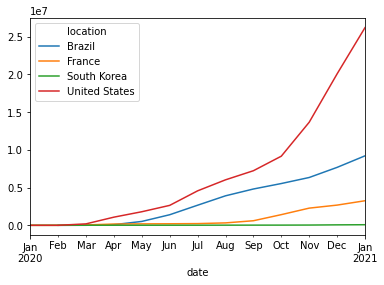

In [141]:
ex1.set_index(['date', 'location']).unstack()['total_cases'].plot()

- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기

In [149]:
covid['year'] = covid.date.apply(lambda X: X.strftime('%Y'))
covid['month'] = covid.date.apply(lambda X: X.strftime('%m'))
covid['day'] = covid.date.apply(lambda X: X.strftime('%d'))
covid['weekNumber'] = covid.date.apply(lambda X: X.strftime('%U'))
covid['weekDay'] = covid.date.apply(lambda X: X.strftime('%a'))
# #covid.date.apply(lambda X: X.strftime('%Y'))


<ipython-input-149-4a5b52660fe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['year'] = covid.date.apply(lambda X: X.strftime('%Y'))


In [150]:
covid

,location,date,total_cases,new_cases,year,month,day,weekNumber,weekDay
9104,Brazil,2020-02-26,1.0,1.0,2020,02,26,08,Wed
9105,Brazil,2020-02-27,1.0,0.0,2020,02,27,08,Thu
9106,Brazil,2020-02-28,1.0,0.0,2020,02,28,08,Fri
9107,Brazil,2020-02-29,2.0,1.0,2020,02,29,08,Sat
9108,Brazil,2020-03-01,2.0,0.0,2020,03,01,09,Sun
...,...,...,...,...,...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0,2021,02,19,07,Fri
67544,United States,2021-02-20,28077620.0,71510.0,2021,02,20,07,Sat
67545,United States,2021-02-21,28134115.0,56495.0,2021,02,21,08,Sun
67546,United States,2021-02-22,28190159.0,56044.0,2021,02,22,08,Mon


In [153]:
# 쿼터(분기) 정보 추가
covid['quarter'] = covid.date.apply(lambda X: pd.Timestamp(X).quarter)

<ipython-input-153-eb2a945a8e31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['quarter'] = covid.date.apply(lambda X: pd.Timestamp(X).quarter)


In [154]:
covid

,location,date,total_cases,new_cases,year,month,day,weekNumber,weekDay,quarter
9104,Brazil,2020-02-26,1.0,1.0,2020,02,26,08,Wed,1
9105,Brazil,2020-02-27,1.0,0.0,2020,02,27,08,Thu,1
9106,Brazil,2020-02-28,1.0,0.0,2020,02,28,08,Fri,1
9107,Brazil,2020-02-29,2.0,1.0,2020,02,29,08,Sat,1
9108,Brazil,2020-03-01,2.0,0.0,2020,03,01,09,Sun,1
...,...,...,...,...,...,...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0,2021,02,19,07,Fri,1
67544,United States,2021-02-20,28077620.0,71510.0,2021,02,20,07,Sat,1
67545,United States,2021-02-21,28134115.0,56495.0,2021,02,21,08,Sun,1
67546,United States,2021-02-22,28190159.0,56044.0,2021,02,22,08,Mon,1


In [157]:
covid.pivot_table(index = 'weekDay', columns = 'location', values = 'new_cases', aggfunc = 'sum')

location,Brazil,France,South Korea,United States
weekDay,,,,
Fri,1670028.0,626464.0,13001.0,4445369.0
Mon,805163.0,365153.0,11188.0,3629148.0
Sat,1537633.0,573388.0,13012.0,4183584.0
Sun,884578.0,492209.0,11109.0,3504755.0
Thu,1831775.0,593989.0,13246.0,4327143.0
Tue,1715474.0,539431.0,13511.0,4010477.0
Wed,1813224.0,498900.0,13052.0,4161118.0


- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기

<AxesSubplot:xlabel='year,quarter'>

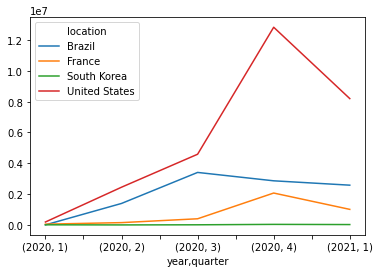

In [160]:
covid.pivot_table(index = ['year', 'quarter'], columns = 'location', values = 'new_cases', aggfunc = 'sum').plot()